In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Input
from tensorflow.keras.layers import Dense, Dropout

def model_LSTM(drop_rate, units, time_sequence):

    model = Sequential()

    model.add(LSTM(units, return_sequences = True, input_shape = (time_sequence, 1)))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units, return_sequences = True))
    model.add(Dropout(drop_rate))

    model.add(LSTM(units))
    model.add(Dropout(drop_rate))

    model.add(Dense(1))
    
    return model
 #   input_data = Input(batch_shape=(batch_size,input_size,input_dimension))
  #  l1 = LSTM(units, return_sequences = True)(input_data)
   # b1 = Dropout(0.2)(l1)
    #l2 = LSTM(units, return_sequences=True)(b1)
   # b2 = Dropout(0.2)(l2)
   # l3 = LSTM(units, return_sequences=True)(b2)
   # b3 = Dropout(0.2)(l3)
   # l4 = LSTM(units, return_sequences=True)(b3)
   # b4 = Dropout(0.2)(l4)
   # output = Dense(1)(b4)
    
   # model_lstm = Model(inputs=input_data,outputs=output)
   # model_lstm.summary()
   # return model_lstm

Train on 1920 samples, validate on 16 samples
Epoch 1/100
1920/1920 - 14s - loss: 0.0082 - mean_absolute_error: 0.0579 - val_loss: 0.0014 - val_mean_absolute_error: 0.0313
Epoch 2/100
1920/1920 - 11s - loss: 0.0035 - mean_absolute_error: 0.0423 - val_loss: 0.0014 - val_mean_absolute_error: 0.0320
Epoch 3/100
1920/1920 - 11s - loss: 0.0036 - mean_absolute_error: 0.0429 - val_loss: 0.0029 - val_mean_absolute_error: 0.0448
Epoch 4/100
1920/1920 - 9s - loss: 0.0029 - mean_absolute_error: 0.0377 - val_loss: 0.0024 - val_mean_absolute_error: 0.0426
Epoch 5/100
1920/1920 - 10s - loss: 0.0027 - mean_absolute_error: 0.0366 - val_loss: 0.0020 - val_mean_absolute_error: 0.0365
Epoch 6/100
1920/1920 - 10s - loss: 0.0022 - mean_absolute_error: 0.0334 - val_loss: 0.0021 - val_mean_absolute_error: 0.0407
Epoch 7/100
1920/1920 - 9s - loss: 0.0023 - mean_absolute_error: 0.0333 - val_loss: 0.0033 - val_mean_absolute_error: 0.0453
Epoch 8/100
1920/1920 - 10s - loss: 0.0023 - mean_absolute_error: 0.0334 -

Epoch 77/100
1920/1920 - 9s - loss: 7.9871e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0012 - val_mean_absolute_error: 0.0291
Epoch 78/100
1920/1920 - 10s - loss: 9.5084e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0019 - val_mean_absolute_error: 0.0373
Epoch 79/100
1920/1920 - 10s - loss: 7.4721e-04 - mean_absolute_error: 0.0190 - val_loss: 7.3512e-04 - val_mean_absolute_error: 0.0227
Epoch 80/100
1920/1920 - 10s - loss: 7.5215e-04 - mean_absolute_error: 0.0186 - val_loss: 8.8087e-04 - val_mean_absolute_error: 0.0252
Epoch 81/100
1920/1920 - 10s - loss: 8.1564e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0020 - val_mean_absolute_error: 0.0379
Epoch 82/100
1920/1920 - 10s - loss: 8.0846e-04 - mean_absolute_error: 0.0192 - val_loss: 7.4969e-04 - val_mean_absolute_error: 0.0229
Epoch 83/100
1920/1920 - 10s - loss: 7.8878e-04 - mean_absolute_error: 0.0189 - val_loss: 6.9356e-04 - val_mean_absolute_error: 0.0223
Epoch 84/100
1920/1920 - 10s - loss: 8.3671e-04 - mean_absolute_erro

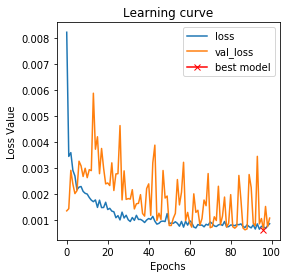

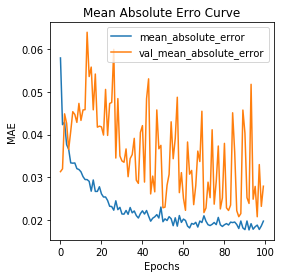

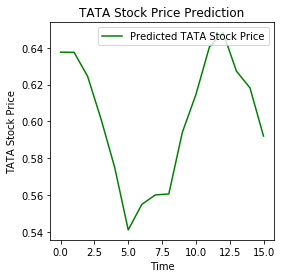

In [10]:
from tensorflow.keras.optimizers import Adam

#from tensorflow.keras import metrics
#from tensorflow.keras import losses
#initialize the model paramters
batch_size = 16
units = 40
drop_rate = 0.2
LR = 0.001
epochs = 100
input_dimension = 1
#load the training and test data
X_train, y_train, X_val, y_val = data_loader()

#generate the model and compile it
model = model_LSTM(drop_rate, units, X_train.shape[1])
model.compile(loss='mean_squared_error', optimizer=Adam(lr=LR), metrics=['mean_absolute_error'])

#train the model 
History = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_val, y_val), verbose=2)
#predict the prices
predicted_stock_price = model.predict(X_val)


import matplotlib.pyplot as plt

#def plotter():
   # fig = plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
    #Training vs Validation Learning loss 
fig = plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot(np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train and test accuracy plot
fig2 = plt.figure(figsize=(4,4))
plt.title("Mean Absolute Erro Curve")
plt.plot(History.history["mean_absolute_error"], label="mean_absolute_error")
plt.plot(History.history["val_mean_absolute_error"], label="val_mean_absolute_error")
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(); 

fig3 = plt.figure(figsize=(4,4))
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

#predicted_stock_price = sc.inverse_transform(predicted_stock_price)